__Задача 1__

Объясняемая переменная y зависит от двух категориальных факторов A и B, причём фактор A имеет 3 уровня, а фактор B - 4 уровня. Результаты наблюдений приведены в таблице:

y = [[2.68, 3.29, 2.88, 4.45],
     [4.12, 4.96, 5.09, 5.22],
     [5.52, 4.50, 5.42, 5.29]]
С помощью двухфакторного дисперсионного анализа проверьте влияние каждого из факторов на переменную y.

In [2]:
import numpy as np

In [3]:
y = np.array([[2.68, 3.29, 2.88, 4.45], [4.12, 4.96, 5.09, 5.22], [5.52, 4.50, 5.42, 5.29]])
m = 3
k = 4

In [5]:
y

array([[2.68, 3.29, 2.88, 4.45],
       [4.12, 4.96, 5.09, 5.22],
       [5.52, 4.5 , 5.42, 5.29]])

In [6]:
y[:,0]

array([2.68, 4.12, 5.52])

  найдем выборочные средние по каждой строке - фактор А

In [7]:
A1 = y[0:1]
A2 = y[1:2]
A3 = y[2:3]
A1_mean = y[0:1].mean()
A2_mean = y[1:2].mean()
A3_mean = y[2:3].mean()

A = np.array([A1_mean, A2_mean, A3_mean])
A

array([3.325 , 4.8475, 5.1825])

__Найдем общее среднее__

In [8]:
y_mean = y.mean()
y_mean 

4.451666666666666

Найдем значение $SS_a$:

In [9]:
SS_a = k * ( (A1_mean - y_mean) ** 2 + (A2_mean - y_mean) ** 2 + (A3_mean - y_mean) ** 2)
SS_a 

7.8407166666666654

__найдем выборочные средние по каждому столбцу- фактор B__

In [10]:
B1 = y[0:,0]
B2 = y[0:,1]
B3 = y[0:,2]
B4 = y[0:,3]

B1_mean = y[0:,0].mean()
B2_mean = y[0:,1].mean()
B3_mean = y[0:,2].mean()
B4_mean = y[0:,3].mean()

B1_mean, B2_mean, B3_mean, B4_mean
B = np.array([B1_mean, B2_mean, B3_mean, B4_mean])
B

array([4.10666667, 4.25      , 4.46333333, 4.98666667])

Найдем значение $SS_b$:

In [11]:
SS_b = m * ( (B1_mean - y_mean) ** 2 + (B2_mean - y_mean) ** 2 + (B3_mean - y_mean) ** 2 + (B4_mean - y_mean) ** 2 )
SS_b 

1.338166666666669

Найдем значение  $SS_w$:

In [12]:
SS_w = ((A1 - A1_mean - B + y_mean) ** 2).sum() + ((A2 - A2_mean - B + y_mean) ** 2).sum() + ((A3 - A3_mean - B + y_mean) ** 2).sum()
     
SS_w       

1.9298833333333332

__Оценки дисперсий__

$$\sigma_a^2 = \dfrac{SS_a}{m - 1}, \sigma_b^2 = \dfrac{SS_b}{k - 1}, \:\: \sigma_w^2 = \dfrac{SS_w}{k - 1}{m - 1} $$

In [14]:
sigma_a2 = SS_a / (m - 1)

sigma_b2 = SS_b / (k - 1)

sigma_w2 = SS_w / ((m - 1) * (k - 1))

sigma_a2, sigma_b2, sigma_w2

(3.9203583333333327, 0.4460555555555563, 0.3216472222222222)

Итак, статистика для проверки гипотезы $H_0$:
$$F_a = \dfrac{\sigma_a^2}{\sigma_w^2}$$,     $$F_b = \dfrac{\sigma_b^2}{\sigma_w^2}$$

В предположении верности гипотезы $H_0$ статистика $F$ имеет распределение Фишера с параметрами $k1a = m − 1$, $k2a = n − m$, где n = m · k — общее число элементов в выборке.
Критическая область здесь правосторонняя:
$$\Omega_\alpha = \left( t_{1 - \alpha, \: k_1, k_2}, \infty \right),$$
где $t_{\beta, \: k_1, k_2}$ — квантиль порядка $\beta$ для распределения Фишера с параметрами $k_1$, $k_2$.

__Значение статистики  𝐹_a__:

In [16]:
F_a = sigma_a2 / sigma_w2
F_a

12.188379262995172

__Значение статистики  𝐹_b__:

In [17]:
F_b = sigma_b2 / sigma_w2
F_b

1.3867850388192748

Зафиксируем уровень значимости  𝛼=0.05 . Для него найдём нужный нам квантиль:

In [19]:
from scipy import stats

In [22]:
n = k*m
k1a = m - 1
k2a = n - m

alpha = 0.05

t_a = stats.f.ppf(1 - alpha, k1a, k2a)
t_a

4.25649472909375

In [23]:
n = k*m
k1b = k - 1
k2b = n - k

alpha = 0.05

t_b = stats.f.ppf(1 - alpha, k1b, k2b)
t_b

4.06618055135116

In [25]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

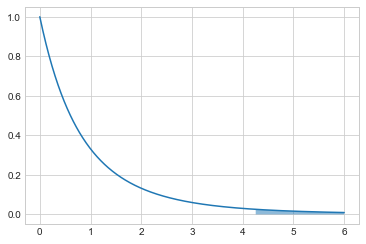

In [27]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1a, k2a)

ox_right = np.linspace(t_a, 6, 100)
oy_right = stats.f.pdf(ox_right, k1a, k2a)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

__Вывод:__ 
Так как значение статистики F_a = 12,18 больше чем t_a = 4.25 - попадает в критическую область, то гипотиза H0a об отсутствии влиянии фактора А, отклоняется.

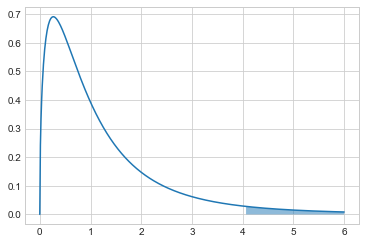

In [34]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1b, k2b)

ox_right = np.linspace(t_b, 6, 100)
oy_right = stats.f.pdf(ox_right, k1b, k2b)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

__Вывод:__ Так как значение статистики F_b = 1.38 меньше чем t_a = 4.06 - не попадает в критическую область, то гипотиза H0b об отсутствии влиянии фактора B, подтверждается.

__Задача 2 в процессе__